In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [2]:
# Download latest version
path = kagglehub.dataset_download("terminus7/pokemon-challenge")

print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/terminus7/pokemon-challenge/versions/1


In [3]:
data = pd.read_csv('/workspaces/codespaces-jupyter/data/pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [5]:
# data.corr() <- code ini akan menghasilkan error

In [6]:
# melakukan identifikasi kolom yang memiliki tipe data 'object' atau 'string'
object_column = data.select_dtypes(include=['object']).columns

In [7]:
# menghapus kolom yang bertipe 'object' atau 'string'
data_corr = data.drop(columns= object_column)

In [8]:
print("DataFrame sebelum dihapus kolom bertipe object:")
print(data)
print("\nDataFrame setelah dihapus kolom bertipe object:")
print(data_corr)

DataFrame sebelum dihapus kolom bertipe object:
       #            Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0      1       Bulbasaur    Grass  Poison  45      49       49       65   
1      2         Ivysaur    Grass  Poison  60      62       63       80   
2      3        Venusaur    Grass  Poison  80      82       83      100   
3      4   Mega Venusaur    Grass  Poison  80     100      123      122   
4      5      Charmander     Fire     NaN  39      52       43       60   
..   ...             ...      ...     ...  ..     ...      ...      ...   
795  796         Diancie     Rock   Fairy  50     100      150      100   
796  797    Mega Diancie     Rock   Fairy  50     160      110      160   
797  798  Hoopa Confined  Psychic   Ghost  80     110       60      150   
798  799   Hoopa Unbound  Psychic    Dark  80     160       60      170   
799  800       Volcanion     Fire   Water  80     110      120      130   

     Sp. Def  Speed  Generation  Legendary  
0     

In [9]:
data_corr.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,45,49,49,65,65,45,1,False
1,2,60,62,63,80,80,60,1,False
2,3,80,82,83,100,100,80,1,False
3,4,80,100,123,122,120,80,1,False
4,5,39,52,43,60,50,65,1,False


In [10]:
data_corr.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


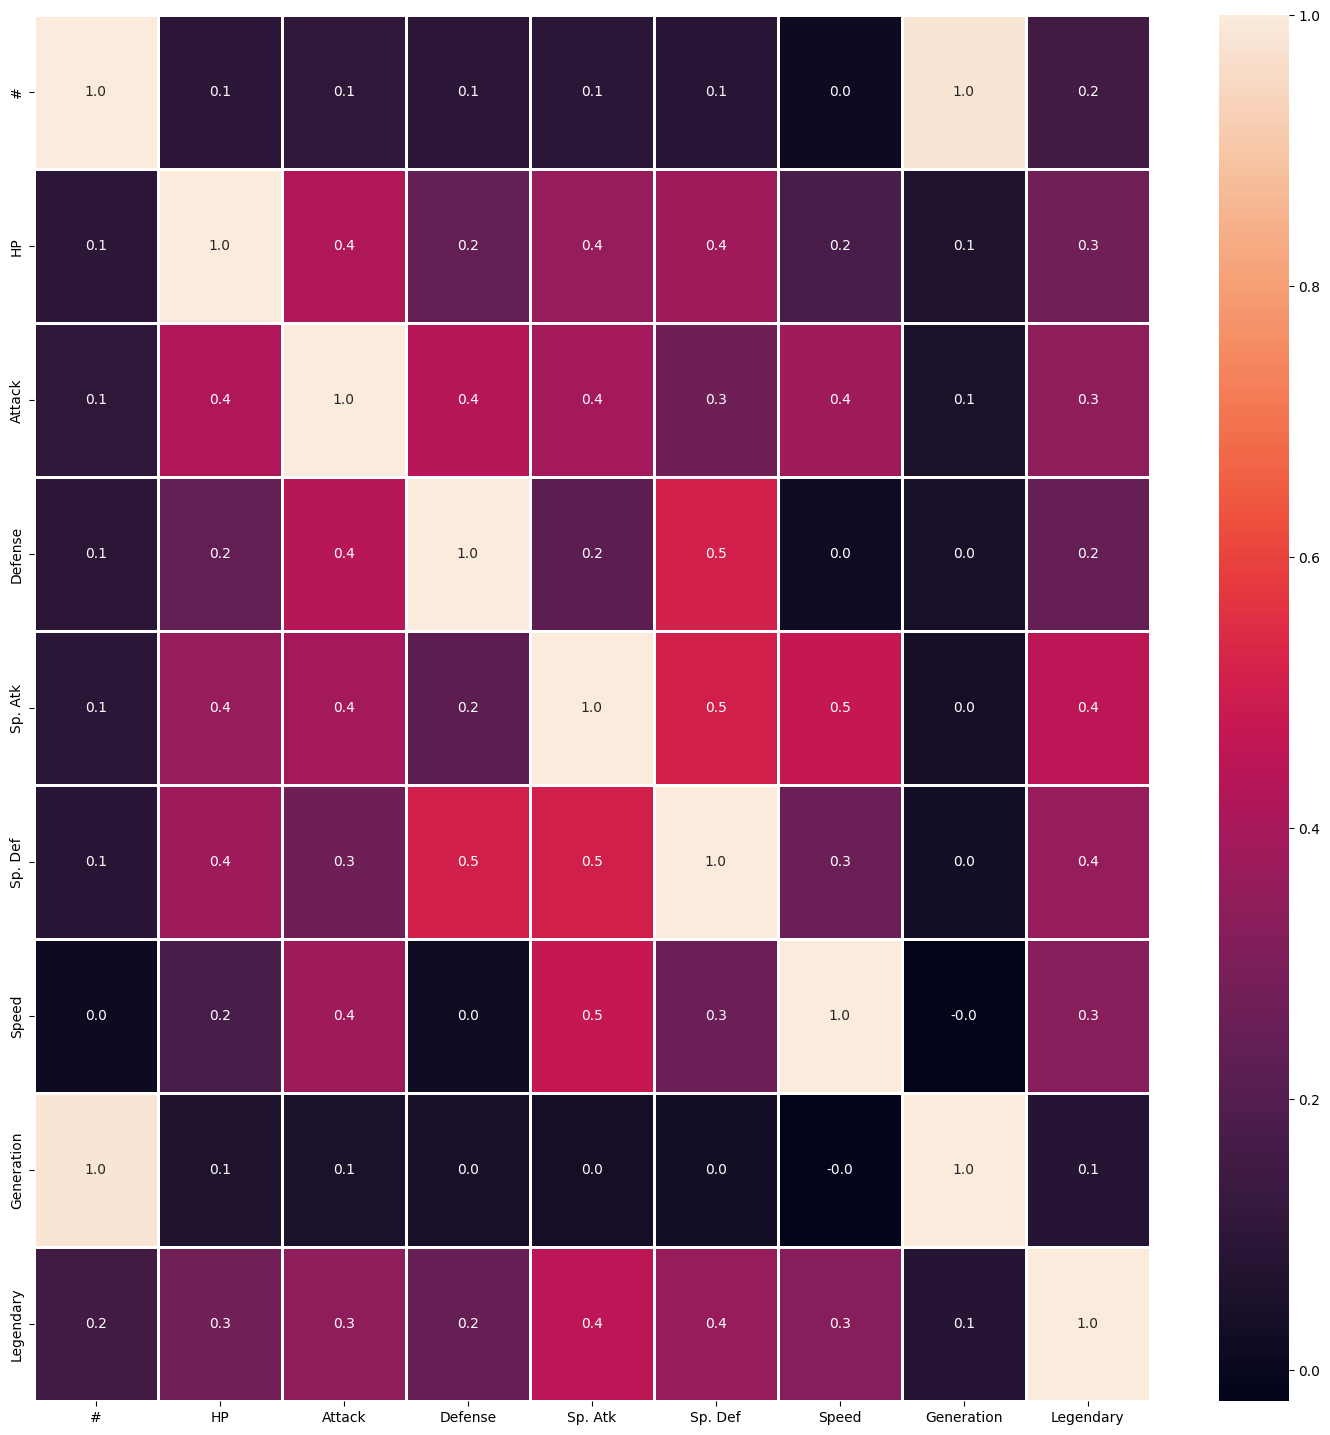

In [11]:
# melakukan corelasi map
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(data_corr.corr(), annot=True, linewidths=2, fmt= '.1f', ax=ax)
plt.show()

In [12]:
# data_corr.boxplot(column='Attack',by = 'Legendary')

<Figure size 1000x600 with 0 Axes>

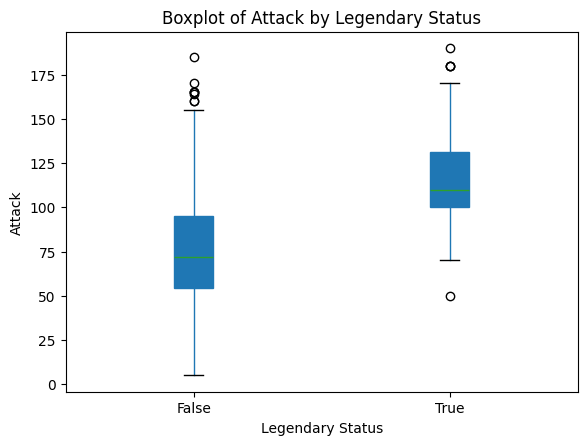

In [13]:
# Plot boxplot
plt.figure(figsize=(10, 6))
boxplot = data.boxplot(column='Attack', by='Legendary', grid=False, patch_artist=True)

# Menambahkan warna pada boxplot
colors = ['#FF9999', '#66B2FF']
for patch, color in zip(boxplot.artists, colors):
    patch.set_facecolor(color)

# Menambahkan judul dan label sumbu
plt.title('Boxplot of Attack by Legendary Status')
plt.suptitle('')  # Menghilangkan judul default untuk menghindari redundansi
plt.xlabel('Legendary Status')
plt.ylabel('Attack')

# Menampilkan plot
plt.show()

In [14]:
data.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [15]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

#### Plot Data

**MATPLOTLIB**
: Matplot is a python library that help us to plot data. The easiest and most basic plots are line, scatter and histogram plots.

* Line plot is better when x axis is time.
* Scatter is better when there is correlation between two variables
* Histogram is better when we need to see distribution of numerical data.
* Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle

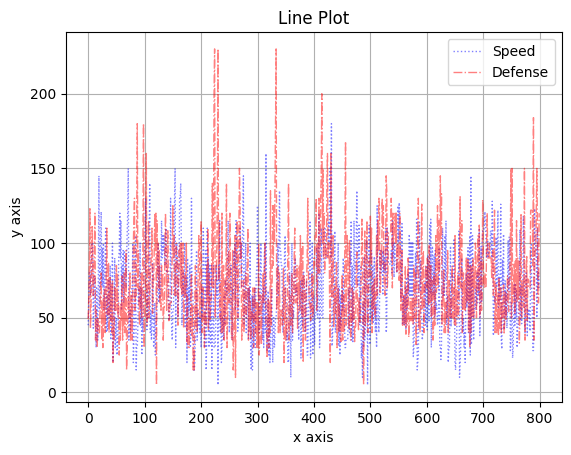

In [16]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data_corr.Speed.plot(kind = 'line', color = 'b',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data_corr.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

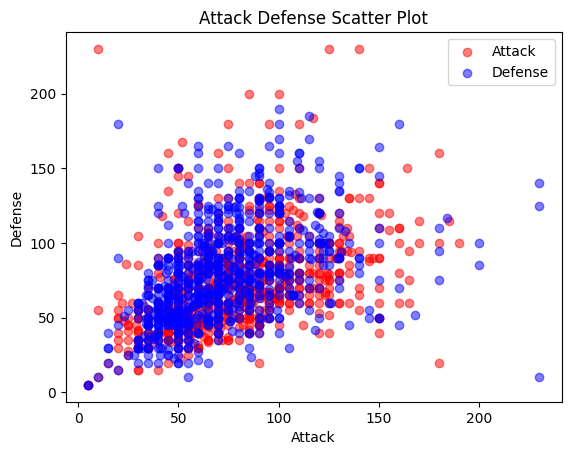

In [17]:
# Membuat scatter plot dengan warna berbeda untuk Attack dan Defense
plt.scatter(data['Attack'], data['Defense'], alpha=0.5, color='red', label='Attack')
plt.scatter(data['Defense'], data['Attack'], alpha=0.5, color='blue', label='Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack Defense Scatter Plot')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

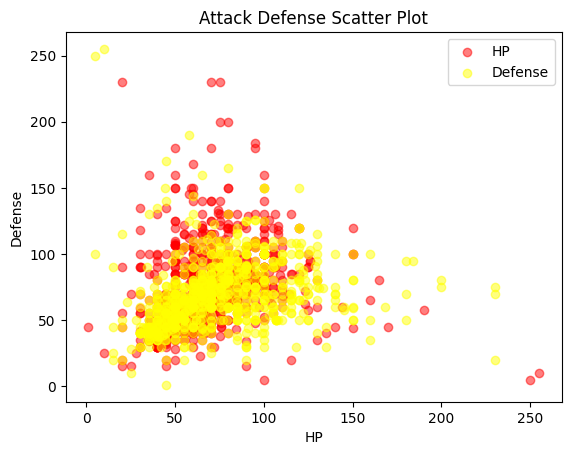

In [26]:
# Membuat scatter plot dengan warna berbeda untuk Defence dan HP
plt.scatter(data['HP'], data['Defense'], alpha=0.5, color='red', label='HP')
plt.scatter(data['Defense'], data['HP'], alpha=0.5, color='yellow', label='Defense')
plt.xlabel('HP')
plt.ylabel('Defense')
plt.title('Attack Defense Scatter Plot')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

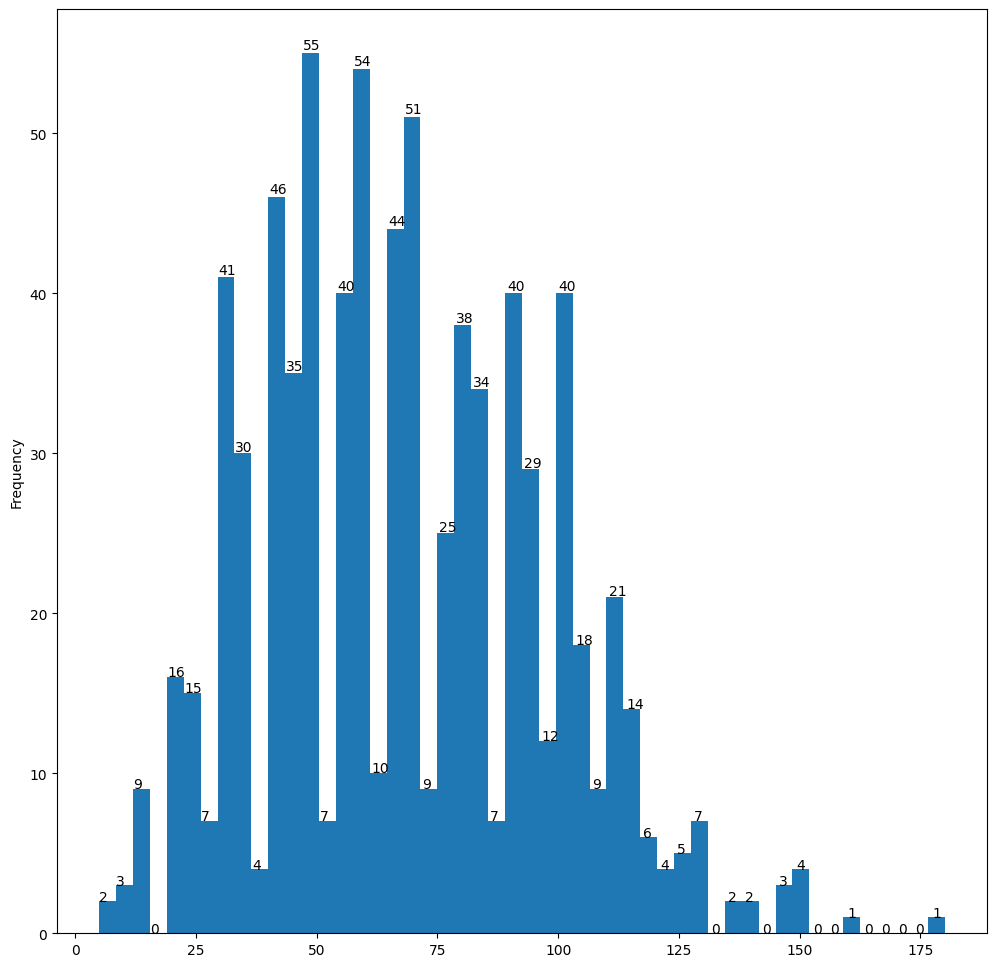

In [18]:
# Plot histogram
ax = data.Speed.plot(kind='hist', bins=50, figsize=(12,12))

# Menambahkan label nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

#### Hierarchical indexing

In [22]:
data1 = data.set_index(["Type 1","Type 2"]) 
data1.head(20)

#              Name  HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                                
Grass  Poison   1         Bulbasaur  45      49       49       65       65   
       Poison   2           Ivysaur  60      62       63       80       80   
       Poison   3          Venusaur  80      82       83      100      100   
       Poison   4     Mega Venusaur  80     100      123      122      120   
Fire   NaN      5        Charmander  39      52       43       60       50   
       NaN      6        Charmeleon  58      64       58       80       65   
       Flying   7         Charizard  78      84       78      109       85   
       Dragon   8  Mega Charizard X  78     130      111      130       85   
       Flying   9  Mega Charizard Y  78     104       78      159      115   
Water  NaN     10          Squirtle  44      48       65       50       64   
       NaN     11         Wartortle  59      63       80       65       80   
       NaN     12         Blastoise  79      83      100       85      105   
       NaN     13    Mega Blastoise  79     103      120      135      115   
Bug    NaN     14          Caterpie  45      30       35       20       20   
       NaN     15           Metapod  50      20       55       25       25   
       Flying  16        Butterfree  60      45       50       90       80   
       Poison  17            Weedle  40      35       30       20       20   
       Poison  18            Kakuna  45      25       50       25       25   
       Poison  19          Beedrill  65      90       40       45       80   
       Poison  20     Mega Beedrill  65     150       40       15       80   

               Speed  Generation  Legendary  
Type 1 Type 2                                
Grass  Poison     45           1      False  
       Poison     60           1      False  
       Poison     80           1      False  
       Poison     80           1      False  
Fire   NaN        65           1      False  
       NaN        80           1      False  
       Flying    100           1      False  
       Dragon    100           1      False  
       Flying    100           1      False  
Water  NaN        43           1      False  
       NaN        58           1      False  
       NaN        78           1      False  
       NaN        78           1      False  
Bug    NaN        45           1      False  
       NaN        30           1      False  
       Flying     70           1      False  
       Poison     50           1      False  
       Poison     35           1      False  
       Poison     75           1      False  
       Poison    145           1      False

In [20]:
data1.loc["Fire","Flying"] #how to use indexes

/tmp/ipykernel_45909/166853039.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  data1.loc["Fire","Flying"]


#              Name   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                                  
Fire   Flying    7         Charizard   78      84       78      109       85   
       Flying    9  Mega Charizard Y   78     104       78      159      115   
       Flying  159           Moltres   90     100       90      125       85   
       Flying  271             Ho-oh  106     130       90      110      154   
       Flying  731       Fletchinder   62      73       55       56       52   
       Flying  732        Talonflame   78      81       71       74       69   

               Speed  Generation  Legendary  
Type 1 Type 2                                
Fire   Flying    100           1      False  
       Flying    100           1      False  
       Flying     90           1       True  
       Flying     90           2       True  
       Flying     84           6      False  
       Flying    126           6      False

In [24]:
data.shape

(800, 12)

In [25]:
data.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

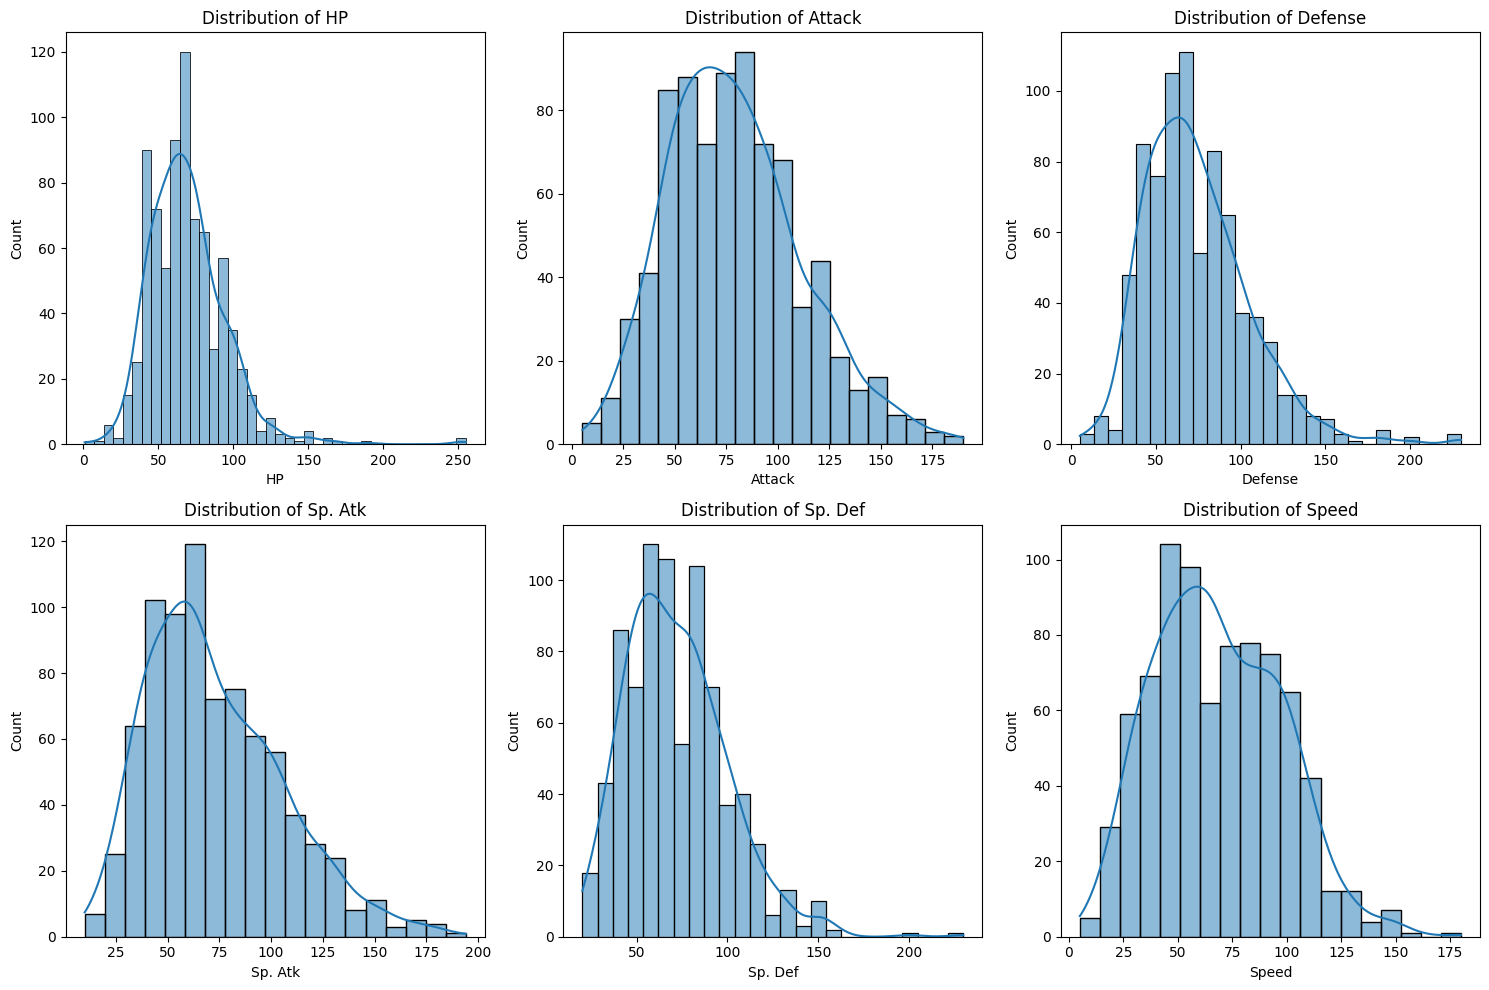

In [28]:
# 1. Distribusi setiap atribut numerik
plt.figure(figsize=(15,10))
for i, column in enumerate(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

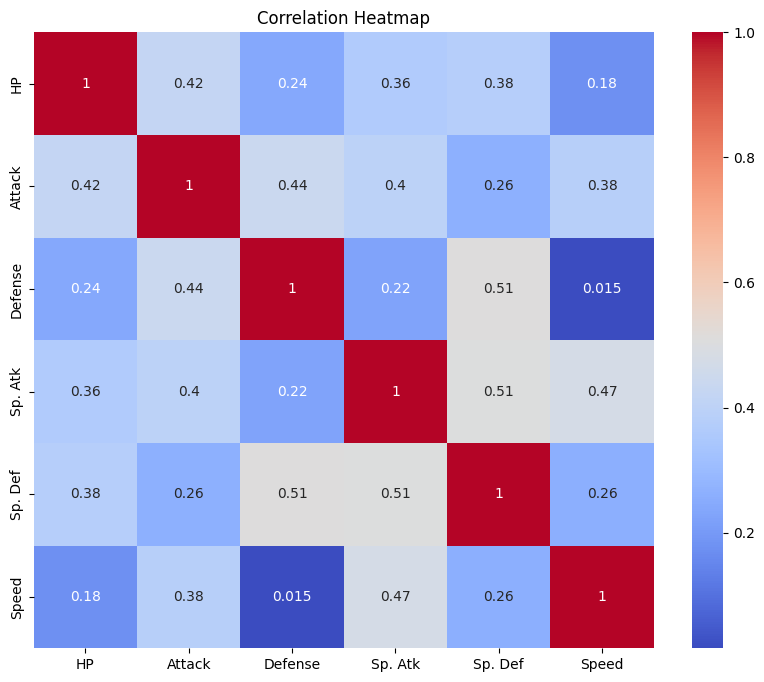

In [29]:
# 2. Heatmap korelasi antara atribut numerik
plt.figure(figsize=(10,8))
sns.heatmap(data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

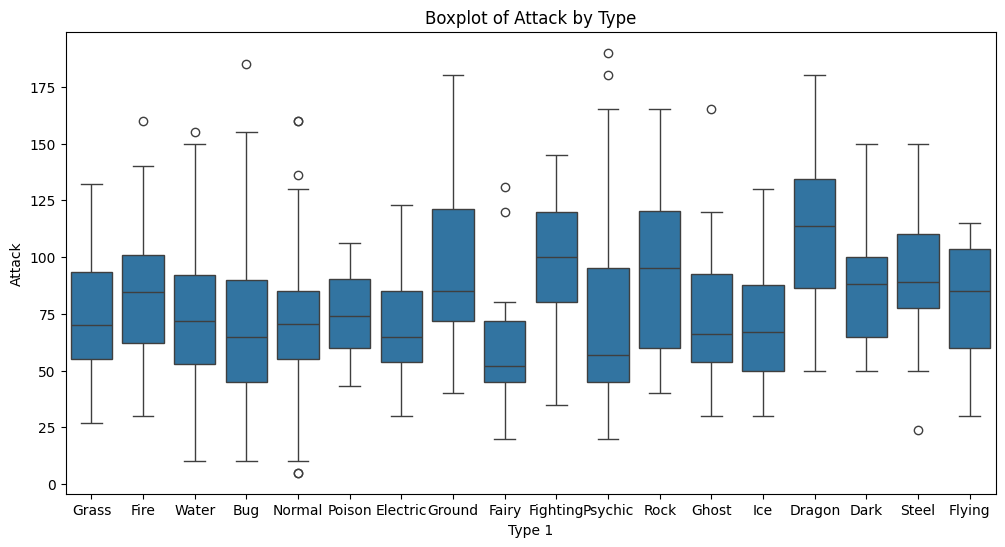

In [27]:
# 3. Boxplot Attack berdasarkan Type
plt.figure(figsize=(12,6))
sns.boxplot(x='Type 1', y='Attack', data=data)
plt.title('Boxplot of Attack by Type')
plt.show()

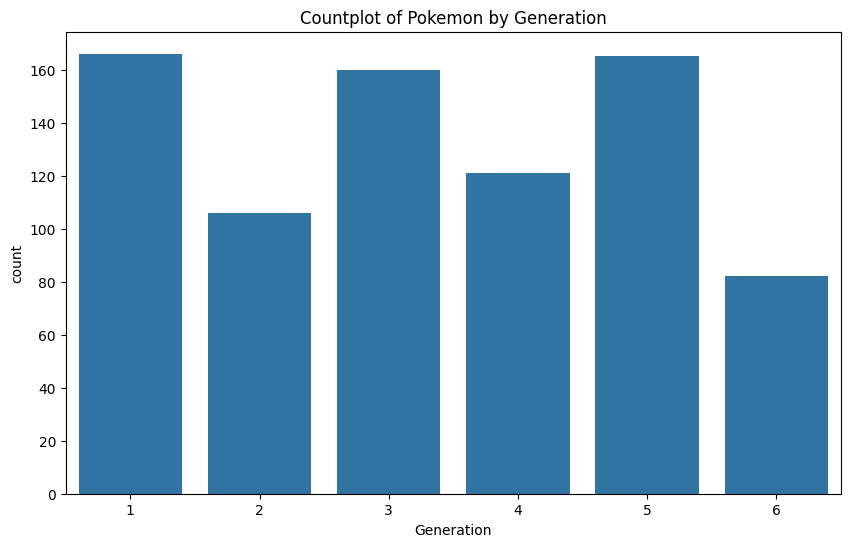

In [30]:
# 4. Countplot Pokemon berdasarkan Generation
plt.figure(figsize=(10,6))
sns.countplot(x='Generation', data=data)
plt.title('Countplot of Pokemon by Generation')
plt.show()

/tmp/ipykernel_45909/1020588238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Legendary', data=data, palette={'True': '#FF9D23', 'False': '#8D77AB'})


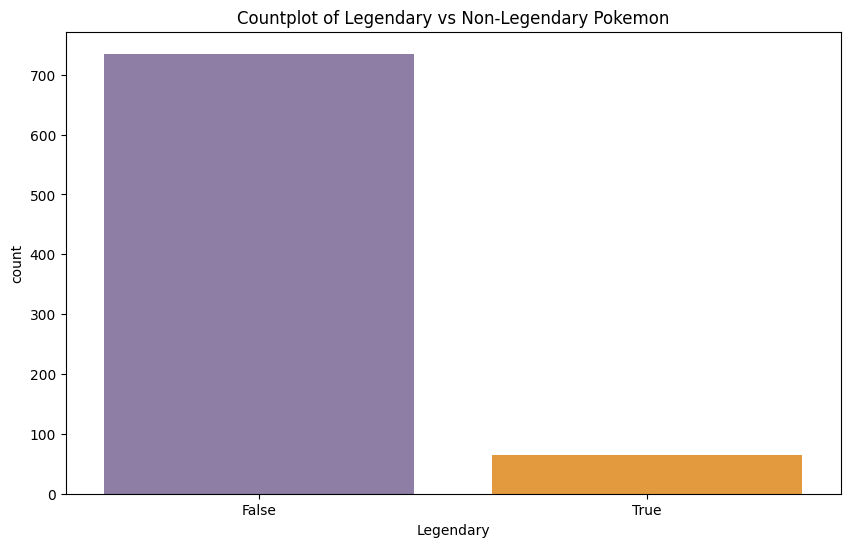

In [36]:
# 5. Countplot Pokemon Legendary vs Non-Legendary

# Convert boolean to string for palette dictionary compatibility
data['Legendary'] = data['Legendary'].astype(str)

# Countplot Pokemon Legendary vs Non-Legendary with custom colors
plt.figure(figsize=(10,6))
sns.countplot(x='Legendary', data=data, palette={'True': '#FF9D23', 'False': '#8D77AB'})
plt.title('Countplot of Legendary vs Non-Legendary Pokemon')
plt.show()